In [ ]:
#meta 2/23/2022 Math Concepts
# visited during course Introduction to TensorFlow
# refer to my-tensorflow-2021/my_course_Intro2TF_tensors-variables.ipynb
# review: prviously on Sigmoid
# refer to myStanfordML_py/ex2_1_LogisticRegression.ipynb

#infra: laptop
#env: anya_tf2
##install tf specific version
#pip install --upgrade tensorflow==2.6.3 --user
#ensured numpy, pandas, tensorflow versions after installation
#numpy 1.19.5, pandas 1.0.3, tensorflow 2.6.3

#here
#2/23/2022 SIGMOID AND SOFTMAX
#      src: https://medium.com/arteos-ai/the-differences-between-sigmoid-and-softmax-activation-function-12adee8cf322#:~:text=Softmax%20is%20used%20for%20multi,Softmax%20function%20looks%20like%20this%3A&text=This%20is%20main%20reason%20why%20the%20Softmax%20is%20cool.


In [13]:
import math
import numpy as np
import tensorflow as tf

## 0. Warm-up

### 0.1 Math

In [3]:
#$mathcode: expit 
x=1
math.e**(x), np.exp(x) #e which is 2.718281828459045

(2.718281828459045, 2.718281828459045)

## 1. Sigmoid function

The Sigmoid function is a mathematical function with a recognizable “S” shaped curve.  
The return value of Sigmoid function is mostly in the range of values between 0 and 1.  

$$f(x) = sigmoid(x) = \frac{1}{1+e^{-x}}$$.

![Logistic Curve](images/Logistic-curve.png)

In [4]:
def sigmoid(z):
    """ function sigmoid
    Input  
    z - scalar, vector, or matrix shape (n+1, m)
    Output
    sigmoid function - scalar, vector or matrix
    """
    
    return  1 / (1 + np.exp(-z))

Test Sigmoid function: 
 - for large positive values, the sigmoid should be close to 1   
 - for large negative values, the sigmoid should be close to 0   
 - evaluating `sigmoid(0)` should give you exactly 0.5

In [8]:
#verify sigmoid works with scalar, vector and matrix
#x = 1
x = np.array([1000,0,-1000])
#x = np.array([[1000,0,-1000],[10,0,-10]])

sigmoid(x)

C:\Users\chq-anyac\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


array([1. , 0.5, 0. ])

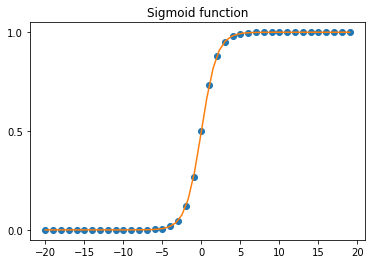

In [10]:
#visualize sigmoid function
# Plot
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import make_interp_spline, BSpline #to smooth the line between points


x = np.arange(-20, 20, 1)
y = sigmoid(x)

#plot smooth sigmoid 
x_smooth = np.linspace(np.array(x).min(), np.array(x).max(), 50)
spl = make_interp_spline(np.array(x), np.array(y), k=3)  # type: BSpline
y_smooth = spl(x_smooth)

#plot
plt.title("Sigmoid function")
plt.plot(x, y, 'o')
plt.plot(x_smooth, y_smooth, '-')
plt.yticks([0,0.5,1])
plt.show()

## 2. Softmax function
Src: Medium blog by Nikola Basta [The Differences between Sigmoid and Softmax Activation Functions](https://medium.com/arteos-ai/the-differences-between-sigmoid-and-softmax-activation-function-12adee8cf322#:~:text=Softmax%20is%20used%20for%20multi,Softmax%20function%20looks%20like%20this%3A&text=This%20is%20main%20reason%20why%20the%20Softmax%20is%20cool.)

The Softmax function (aka SoftArgMax or Normalized Exponential function) takes vectors of real numbers as inputs, and normalizes them into a probability distribution proportional to the exponentials of the input numbers. 

Before applying, some input data could be negative or greater than 1. Also, they might not sum up to 1. After applying Softmax, each element will be in the range of 0 to 1, and the elements will add up to 1. This way, they can be interpreted as a probability distribution. For more clarification, the larger the input number, the larger the probabilities will be.

![Softmax function](images/Softmax.png)

In [15]:
X = np.array([2.0, 1.0, 0.1])
tf.nn.softmax(X)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([0.65900114, 0.24243297, 0.09856589])>